<h1> Chi$^2$ feature selection method</h1>

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from timeit import default_timer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_preprocessed = pd.read_excel("game_reviews_preprocessed.xlsx", index_col=0)

In [3]:
df_preprocessed

,review,voted_up
37439,zeskalowanie świat tracić niemal zupełnie sens...,False
1414,totalny dno kolejka hdodanie serwer wcale nie ...,False
12728,dobra typ gracz nudzić samotny biegać kopalnia...,True
11891,fajny poczuć pikselowym świat otoczyć szlam zo...,True
20635,raz zaczynać sezon niepotrzebny stres niepotrz...,False
...,...,...
37771,tył czas zmarnować internet cholerstwo nie chc...,False
73100,skórka cena gem tragedia dobierać gracz meczeć...,False
4761,ciągły wywalać kolejka kolejka kompania gracz ...,False
41470,naprawdę nieudany postać sporo tył odblokować ...,False


In [4]:
df_preprocessed.drop_duplicates(subset=['review'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['review'], df_preprocessed['voted_up'], test_size=0.3, random_state=42)

In [5]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
tfidf_tokens = vectorizer.get_feature_names()

print(X_train.shape)
X_train = pd.DataFrame(X_train.toarray(), columns=tfidf_tokens)
X_train.head()

(2554, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_test = vectorizer.transform(X_test)
# tfidf_tokens = vectorizer.get_feature_names()

print(X_test.shape)
X_test = pd.DataFrame(X_test.toarray(), columns=tfidf_tokens)
X_test.head()

(1095, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
all_k = [i for i in range(500, 3000, 500)]
all_selectors = []

for k in all_k:
    print(f"> Fitting SelectKBest selector with score func Chi^2 for {k} features")
    selector = SelectKBest(score_func=chi2, k=k)
    selector = selector.fit(X_train, y_train)
    all_selectors.append(selector)

> Fitting SelectKBest selector with score func Chi^2 for 500 features
> Fitting SelectKBest selector with score func Chi^2 for 1000 features
> Fitting SelectKBest selector with score func Chi^2 for 1500 features
> Fitting SelectKBest selector with score func Chi^2 for 2000 features
> Fitting SelectKBest selector with score func Chi^2 for 2500 features


<h3> MultinomialNB </h3>

> Training and evaluating MultinomialNB model for 1 selector with 500 features
0.0016591000003245426
> Training and evaluating MultinomialNB model for 2 selector with 1000 features
0.002662400000190246
> Training and evaluating MultinomialNB model for 3 selector with 1500 features
0.003959199999371776
> Training and evaluating MultinomialNB model for 4 selector with 2000 features
0.0077557999993587146
> Training and evaluating MultinomialNB model for 5 selector with 2500 features
0.006224999999176362
Best k is 2000 with score 0.8301369863013699, recall 0.7661870503597122 and specifity 0.8961038961038961
              precision    recall  f1-score   support

       False       0.79      0.90      0.84       539
        True       0.88      0.77      0.82       556

    accuracy                           0.83      1095
   macro avg       0.84      0.83      0.83      1095
weighted avg       0.84      0.83      0.83      1095

[[483  56]
 [130 426]]


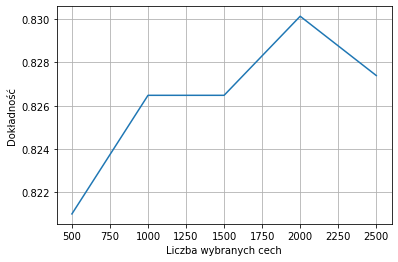

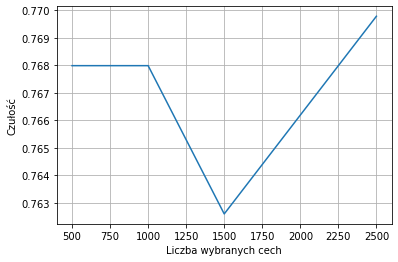

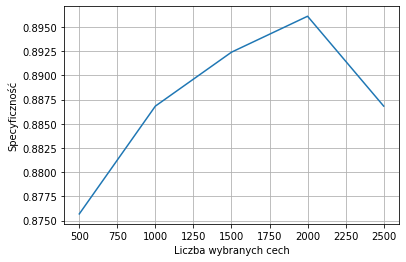

In [8]:
all_scores_MultinomialNB = []
all_specifity_MultinomialNB = []
all_recall_MultinomialNB = []
score_best_MultinomialNB = 0
specifity_best_MultinomialNB = 0
recall_best_MultinomialNB = 0
all_classif_times_MultinomialNB = []
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating MultinomialNB model for {count} selector with {X_test_new.shape[1]} features")

    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

    model = GridSearchCV(MultinomialNB(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_MultinomialNB.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_MultinomialNB.append(score)
    all_specifity_MultinomialNB.append(specificity)
    all_recall_MultinomialNB.append(recall)

    if score > score_best_MultinomialNB:
        score_best_MultinomialNB = score
        specifity_best_MultinomialNB = specificity
        recall_best_MultinomialNB = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_MultinomialNB = model
        best_features_MultinomialNB = sel


print(f"Best k is {k_best} with score {score_best_MultinomialNB}, recall {recall_best_MultinomialNB} and specifity {specifity_best_MultinomialNB}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

In [73]:
# import pickle

# pickle.dump(best_model, open('best_model.joblib', 'wb'))
# pickle.dump(best_features, open('get_features.joblib', 'wb'))
# pickle.dump(vectorizer, open('vectorizer.joblib', 'wb'))

<h3> SVC </h3>

> Training and evaluating SVC model for 1 selector with 500 features
0.5868110999999772
> Training and evaluating SVC model for 2 selector with 1000 features
1.0839465999997628
> Training and evaluating SVC model for 3 selector with 1500 features
1.5682219999998779
> Training and evaluating SVC model for 4 selector with 2000 features
2.656031599999551
> Training and evaluating SVC model for 5 selector with 2500 features
3.290714200000366
Best k is 1500 with score 0.8547945205479452, recall 0.8255395683453237 and specifity 0.8849721706864564
              precision    recall  f1-score   support

       False       0.83      0.88      0.86       539
        True       0.88      0.83      0.85       556

    accuracy                           0.85      1095
   macro avg       0.86      0.86      0.85      1095
weighted avg       0.86      0.85      0.85      1095

[[477  62]
 [ 97 459]]


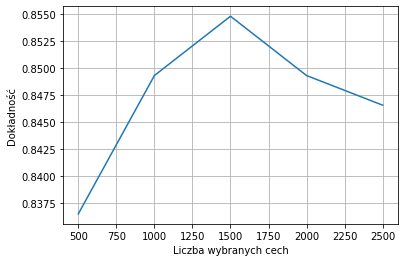

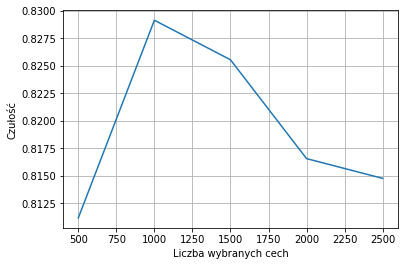

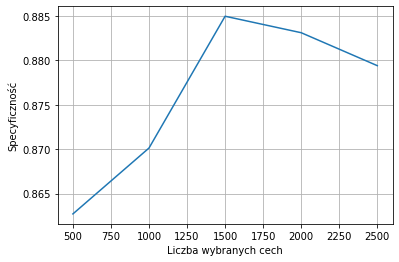

In [9]:
all_scores_SVC = []
all_specifity_SVC = []
all_recall_SVC = []
score_best_SVC = 0
specifity_best_SVC = 0
recall_best_SVC = 0
all_classif_times_SVC = []
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating SVC model for {count} selector with {X_test_new.shape[1]} features")

    param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001]}

    model = GridSearchCV(SVC(), param_grid, verbose=0)

    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_SVC.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_SVC.append(score)
    all_specifity_SVC.append(specificity)
    all_recall_SVC.append(recall)

    if score > score_best_SVC:
        score_best_SVC = score
        specifity_best_SVC = specificity
        recall_best_SVC = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_SVC = model
        best_features_SVC = sel


print(f"Best k is {k_best} with score {score_best_SVC}, recall {recall_best_SVC} and specifity {specifity_best_SVC}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

<h3> LogisticRegression </h3>

> Training and evaluating LogisticRegression model for 1 selector with 500 features
0.0010476999996171799
> Training and evaluating LogisticRegression model for 2 selector with 1000 features
0.0030750999994779704
> Training and evaluating LogisticRegression model for 3 selector with 1500 features
0.003468500000963104
> Training and evaluating LogisticRegression model for 4 selector with 2000 features
0.007024600001386716
> Training and evaluating LogisticRegression model for 5 selector with 2500 features
0.006626399999731802
Best k is 2500 with score 0.8593607305936073, recall 0.8489208633093526 and specifity 0.8701298701298701
              precision    recall  f1-score   support

       False       0.85      0.87      0.86       539
        True       0.87      0.85      0.86       556

    accuracy                           0.86      1095
   macro avg       0.86      0.86      0.86      1095
weighted avg       0.86      0.86      0.86      1095

[[469  70]
 [ 84 472]]


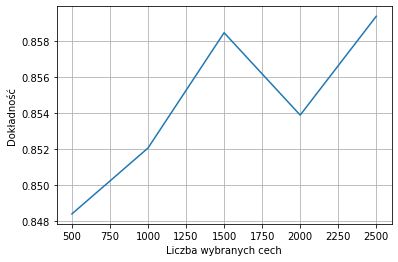

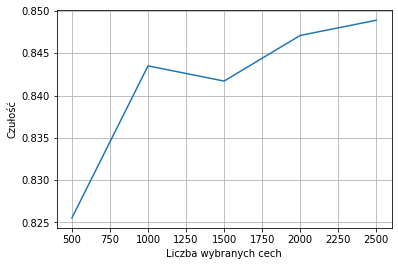

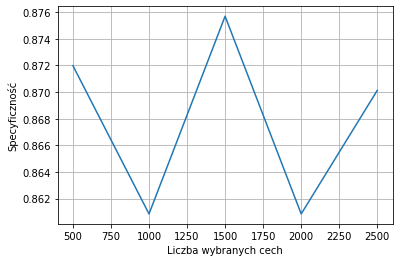

In [10]:
all_scores_LogisticRegression = []
all_specifity_LogisticRegression = []
all_recall_LogisticRegression = []
score_best_LogisticRegression = 0
specifity_best_LogisticRegression = 0
recall_best_LogisticRegression = 0
all_classif_times_LogisticRegression = []
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating LogisticRegression model for {count} selector with {X_test_new.shape[1]} features")

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2', 'elasticnet']}

    model = GridSearchCV(LogisticRegression(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_LogisticRegression.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_LogisticRegression.append(score)
    all_specifity_LogisticRegression.append(specificity)
    all_recall_LogisticRegression.append(recall)

    if score > score_best_LogisticRegression:
        score_best_LogisticRegression = score
        specifity_best_LogisticRegression = specificity
        recall_best_LogisticRegression = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_LogisticRegression = model
        best_features_LogisticRegression = sel


print(f"Best k is {k_best} with score {score_best_LogisticRegression}, recall {recall_best_LogisticRegression} and specifity {specifity_best_LogisticRegression}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

<h3>RandomForestClassifier</h3>

> Training and evaluating RandomForestClassifier model for 1 selector with 500 features
0.18849799999952666
> Training and evaluating RandomForestClassifier model for 2 selector with 1000 features
0.18478770000001532
> Training and evaluating RandomForestClassifier model for 3 selector with 1500 features
0.09051270000054501
> Training and evaluating RandomForestClassifier model for 4 selector with 2000 features
0.20293719999972382
> Training and evaluating RandomForestClassifier model for 5 selector with 2500 features
0.08731140000054438
Best k is 500 with score 0.821917808219178, recall 0.8615107913669064 and specifity 0.7810760667903525
              precision    recall  f1-score   support

       False       0.85      0.78      0.81       539
        True       0.80      0.86      0.83       556

    accuracy                           0.82      1095
   macro avg       0.82      0.82      0.82      1095
weighted avg       0.82      0.82      0.82      1095

[[421 118]
 [ 77 479]]


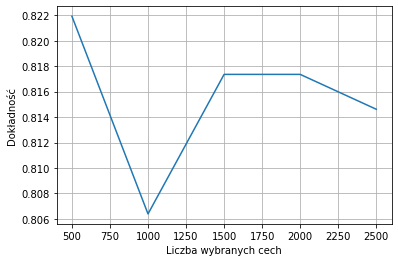

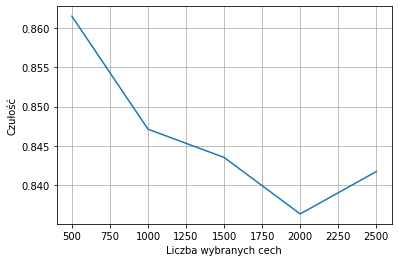

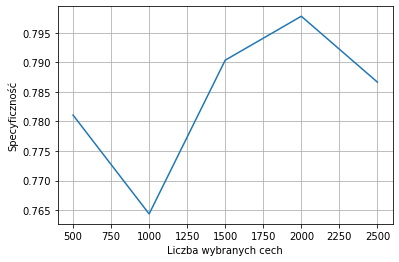

In [11]:
all_scores_RandomForestClassifier = []
all_specifity_RandomForestClassifier = []
all_recall_RandomForestClassifier = []
score_best_RandomForestClassifier = 0
specifity_best_RandomForestClassifier = 0
recall_best_RandomForestClassifier = 0
all_classif_times_RandomForestClassifier = []
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating RandomForestClassifier model for {count} selector with {X_test_new.shape[1]} features")

    param_grid = {'n_estimators': [100, 200, 400, 600]}

    model = GridSearchCV(RandomForestClassifier(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_RandomForestClassifier.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_RandomForestClassifier.append(score)
    all_specifity_RandomForestClassifier.append(specificity)
    all_recall_RandomForestClassifier.append(recall)

    if score > score_best_RandomForestClassifier:
        score_best_RandomForestClassifier = score
        specifity_best_RandomForestClassifier = specificity
        recall_best_RandomForestClassifier = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_RandomForestClassifier = model
        best_features_RandomForestClassifier = sel


print(f"Best k is {k_best} with score {score_best_RandomForestClassifier}, recall {recall_best_RandomForestClassifier} and specifity {specifity_best_RandomForestClassifier}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

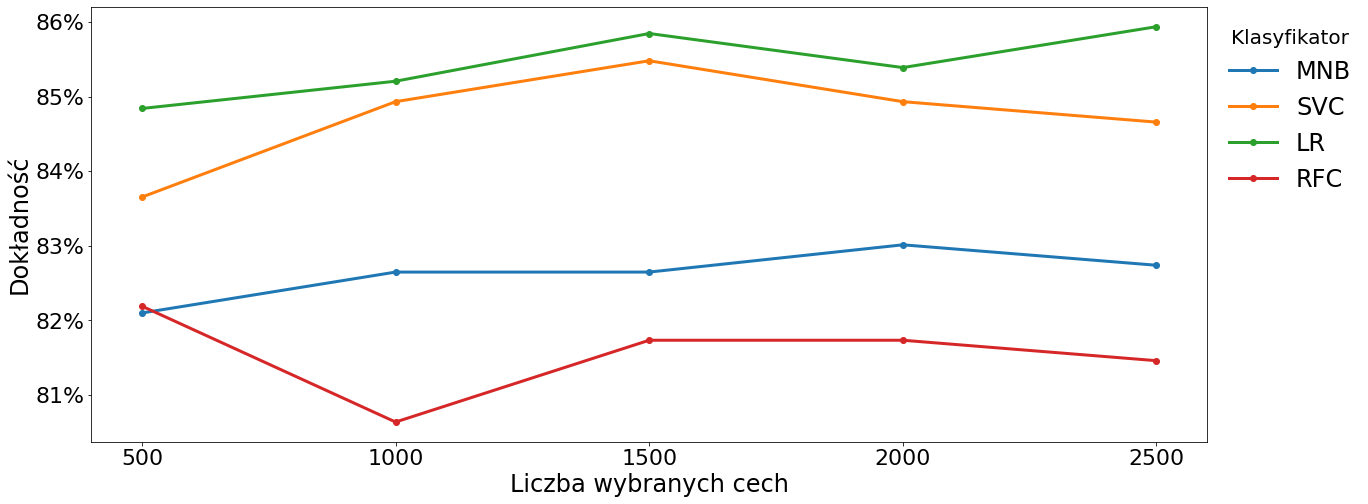

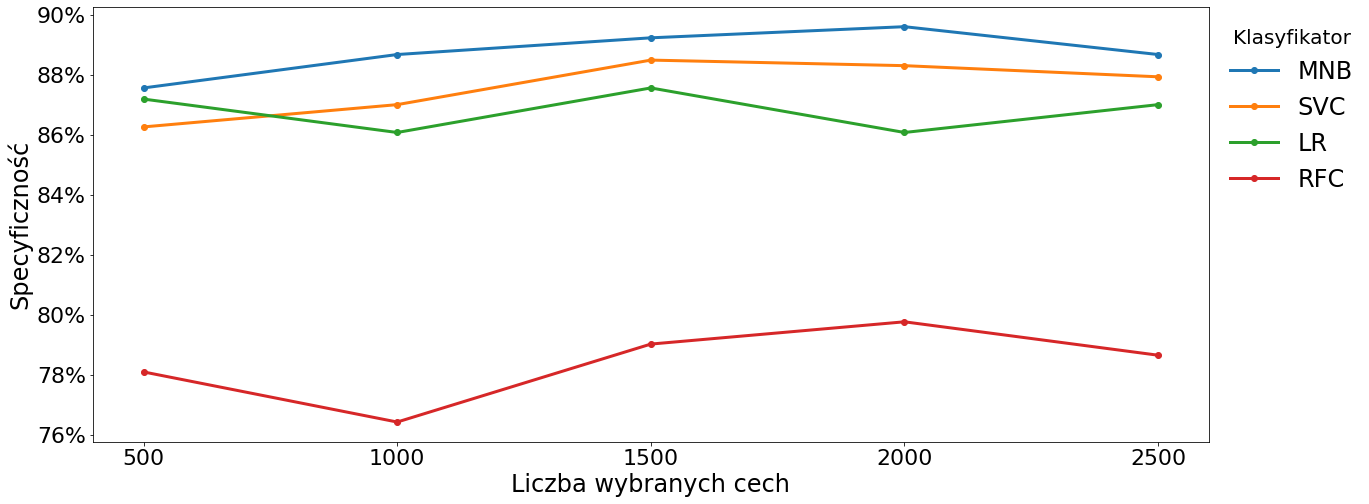

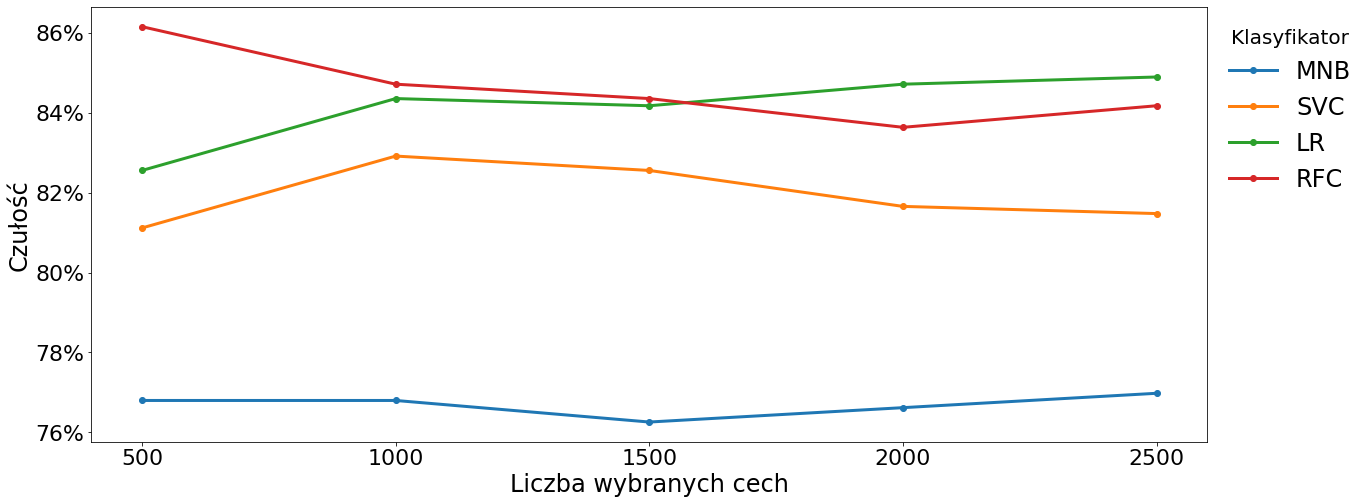

In [79]:
plt.figure(figsize=(20, 8))
fmt = '%2.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)
plt.plot(all_k, [x*100 for x in all_scores_MultinomialNB], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_scores_SVC], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_scores_LogisticRegression], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_scores_RandomForestClassifier], '-o', linewidth=3)

plt.xticks(all_k)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":24}, title="Klasyfikator", title_fontsize=20, bbox_to_anchor=(1, 1), frameon=False)
plt.xlabel("Liczba wybranych cech", fontsize=24)
plt.ylabel("Dokładność", fontsize=24)
# plt.title("Porównanie dokładności modeli dla metody selekcji cech $Chi^2$", fontsize=22)
# plt.grid()
plt.tick_params(axis='both', labelsize=22)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\chi2_accuracy.eps', format='eps', dpi=1200)

plt.figure(figsize=(20, 8))

plt.gca().yaxis.set_major_formatter(yticks)
plt.plot(all_k, [x*100 for x in all_specifity_MultinomialNB], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_specifity_SVC], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_specifity_LogisticRegression], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_specifity_RandomForestClassifier], '-o', linewidth=3)

plt.xticks(all_k)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":24}, title="Klasyfikator", title_fontsize=20, bbox_to_anchor=(1, 1), frameon=False)
plt.xlabel("Liczba wybranych cech", fontsize=24)
plt.ylabel("Specyficzność", fontsize=24)
# plt.title("Porównanie specyficzności modeli dla metody selekcji cech $Chi^2$", fontsize=22)
# plt.grid()
plt.tick_params(axis='both', labelsize=22)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\chi2_specifity.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(20, 8))

plt.gca().yaxis.set_major_formatter(yticks)
plt.plot(all_k, [x*100 for x in all_recall_MultinomialNB], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_recall_SVC], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_recall_LogisticRegression], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_recall_RandomForestClassifier], '-o', linewidth=3)

plt.xticks(all_k)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":24}, title="Klasyfikator", title_fontsize=20, bbox_to_anchor=(1, 1), frameon=False)
plt.xlabel("Liczba wybranych cech", fontsize=24)
plt.ylabel("Czułość", fontsize=24)
# plt.title("Porównanie czułości modeli dla metody selekcji cech $Chi^2$", fontsize=22)
# plt.grid()
plt.tick_params(axis='both', labelsize=22)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\chi2_recall.eps', format='eps', dpi=1200)
plt.show()

In [14]:
pd.DataFrame(np.array([all_classif_times_MultinomialNB, all_classif_times_SVC, all_classif_times_LogisticRegression, all_classif_times_RandomForestClassifier]), index=["MNB", "SVC", "LR", "RFC"], columns=all_k)

,500,1000,1500,2000,2500
MNB,0.001836,0.002138,0.003745,0.005589,0.007067
SVC,0.477944,1.047502,2.124661,2.686448,3.349305
LR,0.001060,0.001787,0.002895,0.003546,0.004431
RFC,0.155377,0.167036,0.255468,0.113361,0.192983
